# Data Quality Check - Post Extraction #

During the extraction phase we made several calls to the Reed API and saved the returned data to both a pandas dataframe and a csv file. 

The next step is to check quality of the data that has been returned.
- Preview the data
- Check data types
- Check for missing values
- Check for duplicates
- Basic statistics
- Data consistency 
- Filter out non tech roles

In [180]:
import pandas as pd

df = pd.read_csv('reed_api_data.csv', index_col=0)

### Preview the data 

In [181]:
len(df)

9997

In [182]:
df.head()

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
0,54047135,409522,WTW,NaN,NaN,Senior Data Scientist,London,NaN,NaN,NaN,30/12/2024,18/11/2024,"We are looking for a Data Scientist, with expe...",14,https://www.reed.co.uk/jobs/senior-data-scient...,London
1,53989684,501640,Vitality,NaN,NaN,Lead Data Scientist,WC2R0DT,NaN,NaN,NaN,06/12/2024,08/11/2024,About The Role Team – &nbsp;Data Science Worki...,29,https://www.reed.co.uk/jobs/lead-data-scientis...,London
2,54032986,543104,Jobheron,NaN,NaN,Data Scientist,London,40000.0,55000.0,GBP,27/12/2024,15/11/2024,"A Data Scientist, who must have a PhD&nbsp; qu...",55,https://www.reed.co.uk/jobs/data-scientist/540...,London
3,53929241,472032,Proactive Appointments,NaN,NaN,Data Scientist,London,NaN,NaN,NaN,10/12/2024,29/10/2024,Data Scientist -&nbsp; Remote Working Data Sci...,245,https://www.reed.co.uk/jobs/data-scientist/539...,London
4,54054640,524441,INTEC SELECT LIMITED,NaN,NaN,Data Scientist,EC3N2EX,450.0,500.0,GBP,01/01/2025,20/11/2024,Data Scientist – 450-500pd PAYE – 7 month cont...,27,https://www.reed.co.uk/jobs/data-scientist/540...,London


Already we can see some missing values indicated by NaN in the dataframe 

In [183]:
df.tail()

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
9992,54030987,375315,Spectrum IT Recruitment,NaN,NaN,Senior PHP Software Engineer,NE11AD,50000.0,60000.0,GBP,29/11/2024,15/11/2024,We're looking for a dynamic Senior PHP Softwar...,19,https://www.reed.co.uk/jobs/senior-php-softwar...,Newcastle
9993,53905046,300264,Client Server Ltd.,NaN,NaN,Senior Software Developer C# .Net API AWS,SR12JR,70000.0,80000.0,GBP,21/11/2024,24/10/2024,Senior Software Developer / Engineer (C# .Net ...,18,https://www.reed.co.uk/jobs/senior-software-de...,Newcastle
9994,53987043,300264,Client Server Ltd.,NaN,NaN,Senior Software Developer C# .Net API AWS,SR12JR,65000.0,80000.0,GBP,06/12/2024,08/11/2024,Senior Software Developer / Engineer (C# .Net ...,12,https://www.reed.co.uk/jobs/senior-software-de...,Newcastle
9995,53980000,300264,Client Server Ltd.,NaN,NaN,Lead Backend Software Engineer C# .Net API AWS,SR12JR,70000.0,80000.0,GBP,05/12/2024,07/11/2024,Lead Backend Software Engineer / Developer (C#...,9,https://www.reed.co.uk/jobs/lead-backend-softw...,Newcastle
9996,53989966,250945,Eligo Recruitment,NaN,NaN,2D Artist,NE15DG,NaN,NaN,NaN,20/12/2024,08/11/2024,Are you an experienced Game Artist within the ...,9,https://www.reed.co.uk/jobs/2d-artist/53989966,Newcastle


When we check the datatypes of the columns in the dataframe we can see the date column is currently a string and not a datatime object so we will change that in the transformation stage

In [184]:
df.dtypes

jobId                    int64
employerId               int64
employerName            object
employerProfileId      float64
employerProfileName    float64
jobTitle                object
locationName            object
minimumSalary          float64
maximumSalary          float64
currency                object
expirationDate          object
date                    object
jobDescription          object
applications             int64
jobUrl                  object
city                    object
dtype: object

Checking fot null values we can see that the employerProfileId and employerProfileName contain no data so these columns can be dropped during the transformation phase. We also have some null values in the salary and currency columns so I will have to work out how to deal with those.

In [185]:
null_counts = df.isnull().sum()
print(null_counts)

jobId                     0
employerId                0
employerName              0
employerProfileId      9997
employerProfileName    9997
jobTitle                  0
locationName              0
minimumSalary          1645
maximumSalary          1645
currency               1645
expirationDate            0
date                      0
jobDescription            0
applications              0
jobUrl                    0
city                      0
dtype: int64


When checking for duplicated rows we can see that the different API searches returned many of the same results so these duplicated rows will need to be removed.

In [186]:
duplicated = df.duplicated().sum()
int(duplicated)

4346

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
max_salary =df[df['maximumSalary']>0]
max_salary.head()

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
2,54032986,543104,Jobheron,NaN,NaN,Data Scientist,London,40000.0,55000.0,GBP,27/12/2024,15/11/2024,"A Data Scientist, who must have a PhD&nbsp; qu...",55,https://www.reed.co.uk/jobs/data-scientist/540...,London
4,54054640,524441,INTEC SELECT LIMITED,NaN,NaN,Data Scientist,EC3N2EX,450.0,500.0,GBP,01/01/2025,20/11/2024,Data Scientist – 450-500pd PAYE – 7 month cont...,27,https://www.reed.co.uk/jobs/data-scientist/540...,London
5,53889520,409660,Huxley,NaN,NaN,Data Scientist,London,500.0,700.0,GBP,03/12/2024,22/10/2024,I'm currently supporting a venture capital com...,178,https://www.reed.co.uk/jobs/data-scientist/538...,London
6,54056851,400289,Huntress,NaN,NaN,Data Scientist,London,50.0,55.0,GBP,27/11/2024,20/11/2024,Data Scientist- London/Remote- 12 Months- 50- ...,31,https://www.reed.co.uk/jobs/data-scientist/540...,London
7,54056357,655092,US TECH SOLUTIONS LIMITED,NaN,NaN,Data Scientist,London,50.0,52.0,GBP,01/01/2025,20/11/2024,An Exciting Contract Opportunity for Data Scie...,28,https://www.reed.co.uk/jobs/data-scientist/540...,London


We can see that there are some major outliers in the maximumSalary column this is due to a scaling issue for example in some cases 50000 is displayed as 50. There also appears to be instances where the salary is measured daily rather than yearly. 

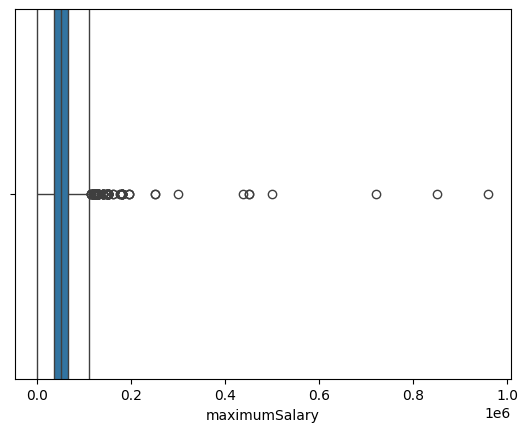

In [189]:

sns.boxplot(x=df['maximumSalary'], width= 2)
plt.show()

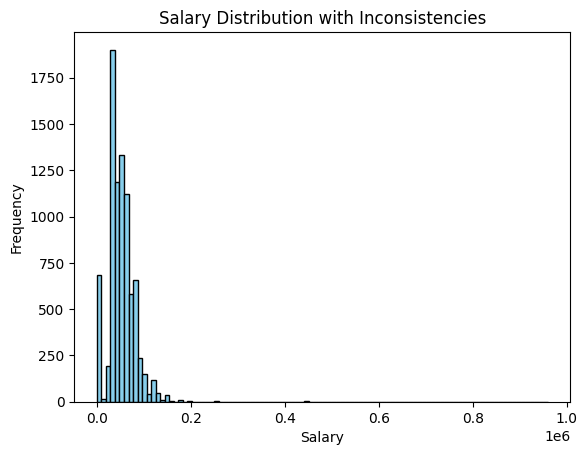

In [190]:
plt.hist(df['maximumSalary'], bins=100, color='skyblue', edgecolor='black')

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution with Inconsistencies')
plt.show()

In [191]:
outliers =df[df['maximumSalary']<1000]
outliers

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
4,54054640,524441,INTEC SELECT LIMITED,NaN,NaN,Data Scientist,EC3N2EX,450.0,500.0,GBP,01/01/2025,20/11/2024,Data Scientist – 450-500pd PAYE – 7 month cont...,27,https://www.reed.co.uk/jobs/data-scientist/540...,London
5,53889520,409660,Huxley,NaN,NaN,Data Scientist,London,500.0,700.0,GBP,03/12/2024,22/10/2024,I'm currently supporting a venture capital com...,178,https://www.reed.co.uk/jobs/data-scientist/538...,London
6,54056851,400289,Huntress,NaN,NaN,Data Scientist,London,50.0,55.0,GBP,27/11/2024,20/11/2024,Data Scientist- London/Remote- 12 Months- 50- ...,31,https://www.reed.co.uk/jobs/data-scientist/540...,London
7,54056357,655092,US TECH SOLUTIONS LIMITED,NaN,NaN,Data Scientist,London,50.0,52.0,GBP,01/01/2025,20/11/2024,An Exciting Contract Opportunity for Data Scie...,28,https://www.reed.co.uk/jobs/data-scientist/540...,London
20,54061393,356157,Career Moves Group,NaN,NaN,58446 - Data Scientist,London,50.0,50.0,GBP,28/11/2024,21/11/2024,Data Scientist Location: London Length: 7 mont...,5,https://www.reed.co.uk/jobs/58446-data-scienti...,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,53897332,648202,Uniting Ambition,NaN,NaN,Senior Android Developer,NG72WS,500.0,545.0,GBP,04/12/2024,23/10/2024,Senior Android Developer Contract **Outside IR...,15,https://www.reed.co.uk/jobs/senior-android-dev...,Derby
9889,54020018,563988,Pontoon,NaN,NaN,Solution Architect Technical Advisory,Welwyn Garden City,750.0,800.0,GBP,25/12/2024,13/11/2024,Solution Architect (Technical Advisory) Retail...,31,https://www.reed.co.uk/jobs/solution-architect...,Luton
9948,52064584,328885,esure Group,NaN,NaN,Java Developer,Manchester,0.0,0.0,GBP,11/12/2024,02/02/2024,"Company Description Here at esure, we’re no st...",221,https://www.reed.co.uk/jobs/java-developer/520...,Manchester
9949,53967983,328885,esure Group,NaN,NaN,Junior Java Developer,Manchester,0.0,0.0,GBP,17/12/2024,05/11/2024,"Company Description Here at esure, we’re no st...",51,https://www.reed.co.uk/jobs/junior-java-develo...,Manchester


In [192]:
nan_salary = df[df['maximumSalary']==0]
print(len(nan_salary))
nan_salary.head()

43


,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
727,53916304,501625,BCT Resourcing,NaN,NaN,Senior Data Scientist,Brighton,0.0,0.0,GBP,09/12/2024,28/10/2024,Senior Data Scientist Brighton / Hybrid Are yo...,12,https://www.reed.co.uk/jobs/senior-data-scient...,Brighton
828,54061700,409522,WTW,NaN,NaN,Product Analyst,London,0.0,0.0,GBP,02/01/2025,21/11/2024,Summary : Working as part of a team to establi...,2,https://www.reed.co.uk/jobs/product-analyst/54...,London
829,54061699,409522,WTW,NaN,NaN,Product Analyst,London,0.0,0.0,GBP,02/01/2025,21/11/2024,Summary : Working as part of a team to establi...,6,https://www.reed.co.uk/jobs/product-analyst/54...,London
1297,53893914,421408,Unite Students,NaN,NaN,Enterprise PMO Analyst,BS16FL,0.0,0.0,GBP,03/12/2024,22/10/2024,The Role At Unite Students our aim is to creat...,36,https://www.reed.co.uk/jobs/enterprise-pmo-ana...,Bristol
2432,52064613,328885,esure Group,NaN,NaN,Java Developer,Glasgow,0.0,0.0,GBP,11/12/2024,02/02/2024,"Company Description Here at esure, we’re no st...",180,https://www.reed.co.uk/jobs/java-developer/520...,Glasgow


In [193]:
count_greater_than_1000 = (df['maximumSalary'] > 1000).sum()
count_greater_than_1000


np.int64(7669)

In [194]:
count_less_than_1000_and_not_0 = ((df['maximumSalary'] < 1000) & (df['maximumSalary'] > 0)).sum()
count_less_than_1000_and_not_0


np.int64(640)

In [195]:
salary_equal_to_0 = (df['maximumSalary']==0).sum()
salary_equal_to_0


np.int64(43)

In [196]:
salary_null = (df['maximumSalary'].isnull()).sum()
salary_null

np.int64(1645)

In [197]:
count_greater_than_1000+count_less_than_1000_and_not_0+salary_equal_to_0+salary_null

np.int64(9997)

In [198]:
normalised_salaries = df[df['maximumSalary'] > 1000]
value_counts = normalised_salaries['maximumSalary'].value_counts()
value_counts

maximumSalary
35000.0     1374
50000.0      737
60000.0      602
45000.0      557
80000.0      509
            ... 
500000.0       1
850000.0       1
300000.0       1
74000.0        1
96000.0        1
Name: count, Length: 197, dtype: int64

## Null values in currency column ##

In [199]:
df['currency'].value_counts()

currency
GBP    8335
EUR      15
AUD       2
Name: count, dtype: int64

In [200]:
df[df['currency']=='EUR']

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
142,54048766,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Birmingham,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,1,https://www.reed.co.uk/jobs/junior-recruiter-r...,Birmingham
218,54048154,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Manchester,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,0,https://www.reed.co.uk/jobs/junior-recruiter-r...,Manchester
302,54048696,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Leeds,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,2,https://www.reed.co.uk/jobs/junior-recruiter-r...,Leeds
349,54048787,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Liverpool,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,1,https://www.reed.co.uk/jobs/junior-recruiter-r...,Liverpool
379,54048760,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Bristol,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,1,https://www.reed.co.uk/jobs/junior-recruiter-r...,Bristol
438,54048939,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Edinburgh,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,0,https://www.reed.co.uk/jobs/junior-recruiter-r...,Edinburgh
482,54048766,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Birmingham,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,1,https://www.reed.co.uk/jobs/junior-recruiter-r...,Coventry
708,54048701,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Cambridge,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,2,https://www.reed.co.uk/jobs/junior-recruiter-r...,Cambridge
733,54048934,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Brighton,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,0,https://www.reed.co.uk/jobs/junior-recruiter-r...,Brighton
749,54048704,153239,NonStop Consulting Ltd,NaN,NaN,Junior Recruiter - Relocation to Prague,Oxford,15600.0,72000.0,EUR,31/12/2024,19/11/2024,Junior Recruitment Consultant | Achieve High E...,1,https://www.reed.co.uk/jobs/junior-recruiter-r...,Oxford


## Filter out non tech roles ##

I noticed that the data contains job listings for non tech jobs which I will attempt to filter out using pandas contains method.  Initially I was thinking to loop through the dataframe to check for a list of tech terms however my research has told me that using pandas 'contains()' method is a more efficient way of achieving this as this method is a vectorised method meaning it is optimised to work on the entire dataframe at once, rather than having to loop through each row individually.  

I used chatgtp to create a list of tech job titles and terms which I then filtered manually to include terms relevant to the project. 

In [219]:
tech_terms = [
    "Software Engineer", "Backend Developer", "Frontend Developer", "Full Stack Developer",
    "Data Scientist", "Data Analyst", "Machine Learning Engineer", "AI Engineer",
    "DevOps Engineer", "Cloud Engineer", "Infrastructure Engineer",
    "Security Engineer", "Network Engineer", "Database Administrator", "Database Engineer",
    "Business Intelligence Analyst", "QA Engineer",
    "Big Data Engineer", "Systems Engineer",
    "Application Developer", "Mobile Developer", "Android Developer", "iOS Developer",
    "Embedded Systems Engineer", "Game Developer", "UI/UX Designer", "Web Developer",
    "Solutions Architect", "IT Architect", "Blockchain Developer", "Blockchain Engineer",
    "Cybersecurity Analyst", "Penetration Tester", "Ethical Hacker", "Cloud Architect",
    "SAP Consultant", "Salesforce Developer", "React Developer", "Angular Developer",
    "Java Developer", "Python Developer", "Ruby on Rails Developer", "PHP Developer",
    "C++ Developer", "C# Developer", "Scala Developer", "Go Developer", "Swift Developer",
    "Rust Developer", "JavaScript Developer", "TypeScript Developer", "SQL Developer",
    "R Developer", "TensorFlow Engineer", "Hadoop Engineer", "ETL Developer",
    "Cloud Solutions Architect", "Solutions Engineer", "Platform Engineer", "Tech Lead",
    "Software Architect", "System Architect", "DevOps Manager",
    "Tech Consultant", "Software Development Manager",
    "Scrum Master", "Data Engineer", "Data Architect", "AI Researcher",
    "Digital Transformation Consultant", "IT Manager", "Cloud Consultant",
    "Cloud Computing", "A.I.", "Machine Learning", "Deep Learning", "Data Science",
    "Big Data", "DevOps", "CI/CD", "Docker", "Kubernetes", "Microservices", "Serverless",
    "Blockchain", "Cybersecurity", "Penetration Testing",
    "Data Analytics", "SQL", "NoSQL", "Python", "Java", "C\+\+", 
    "JavaScript", "Node.js",
    "Angular", "Vue.js", "Ruby on Rails", "AWS", "Google Cloud", "Azure", "Google Kubernetes Engine",
    "GitHub", "GitLab", "Jenkins", "Terraform", "Ansible", "AWS Lambda",
    "Kafka", "Hadoop", "Elasticsearch", "Redis", "MongoDB", "PostgreSQL", "MySQL", "SQL Server",
    "Scala", "TypeScript", "PHP", "Golang", "Rust", "GraphQL", "REST API", "OAuth",
    "OAuth2", "WebSockets", "Serverless Computing", "Edge Computing", "5G", "Virtualization",
    "Containers", "WebAssembly", "Digital Transformation",
    "Cloud Security", "Identity and Access Management", "Penetration Testing", "Natural Language Processing",
    "Business Intelligence", "ETL", "Data Pipelines", "TensorFlow",
    "PyTorch", "OpenAI", "GPT", "LLM", "Deep Reinforcement Learning", "Data Lakes", "Data Warehousing",
    "Geospatial", "Embedded Systems", "Augmented Reality", "Virtual Reality",
    r'\bAI\b'
]


I used the join method to seperate each term in the list with the | symbol which acts as an 'or' operator

In [220]:
tech_terms_regex_pattern = '|'.join(tech_terms)


I then tested the filter on the jobTitle column

In [221]:
non_tech_jobTitles = df[df['jobTitle'].str.contains(tech_terms_regex_pattern, case=False, na=False)==False]
non_tech_jobTitles

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
97,53976685,331522,Harnham - Data & Analytics Recruitment,NaN,NaN,Senior Research Scientist,London,70000.0,90000.0,GBP,04/12/2024,06/11/2024,"Senior Research Scientist London 80,000- 90,00...",35,https://www.reed.co.uk/jobs/senior-research-sc...,London
98,53920078,2763,ADLIB,NaN,NaN,Material Development Scientist,SE15LU,NaN,NaN,NaN,09/12/2024,28/10/2024,This is an exciting opportunity to join an inn...,32,https://www.reed.co.uk/jobs/material-developme...,London
114,54058167,671347,Marston Holdings Ltd,NaN,NaN,Senior Recruitment Manager,B33HT,NaN,NaN,NaN,01/01/2025,20/11/2024,Senior Recruitment Manager&nbsp; Hybrid&nbsp; ...,3,https://www.reed.co.uk/jobs/senior-recruitment...,Birmingham
115,53925455,679812,althaus talent,NaN,NaN,Junior Marketing Executive,B11RS,24500.0,25500.0,GBP,10/12/2024,29/10/2024,"In partnership with Intercity , Althaus are lo...",48,https://www.reed.co.uk/jobs/junior-marketing-e...,Birmingham
116,54018942,387512,Compass Group UK & Ireland Ltd,NaN,NaN,Product Analyst,B459PZ,NaN,NaN,NaN,31/12/2024,13/11/2024,Compass UK&amp;I is a leading contract caterin...,15,https://www.reed.co.uk/jobs/product-analyst/54...,Birmingham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,53919252,416128,Platform Recruitment,NaN,NaN,QA Tester- Birmingham- 25k-40k,B153ED,25000.0,40000.0,GBP,09/12/2024,28/10/2024,My client is a gambling games developer with p...,155,https://www.reed.co.uk/jobs/qa-tester-birmingh...,Wolverhampton
9987,53868932,589081,Walsall Council,NaN,NaN,External Funding Bid Writers,Walsall,42403.0,47420.0,GBP,28/11/2024,17/10/2024,Job Title: External Funding Bid Writers Locati...,4,https://www.reed.co.uk/jobs/external-funding-b...,Wolverhampton
9988,53930076,410926,Anderson Wright Consulting Ltd,NaN,NaN,Unreal Engine Developer,Belfast,50000.0,65000.0,GBP,10/12/2024,29/10/2024,Unreal Engine Developer - (UE4 / UE5) - Up to ...,4,https://www.reed.co.uk/jobs/unreal-engine-deve...,Belfast
9989,54038438,501625,BCT Resourcing,NaN,NaN,D365 F&O Developer,Oxford,65000.0,65000.0,GBP,28/12/2024,16/11/2024,D365 F&amp;O Developer Ready to Shape the Futu...,1,https://www.reed.co.uk/jobs/d365-f-o-developer...,Oxford


I also tested the filter on the jobDescriptions column

In [222]:
non_tech_jobDescriptions = df[df['jobDescription'].str.contains(tech_terms_regex_pattern, case=False, na=False)== False]
non_tech_jobDescriptions

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
89,54023072,412685,Nigel Frank International,NaN,NaN,"Senior Data Scientist - Hybrid/London - £80,000",London,75000.0,80000.0,GBP,26/12/2024,14/11/2024,I'm currently working with a leader within the...,20,https://www.reed.co.uk/jobs/senior-data-scient...,London
111,53931421,524744,Hays Specialist Recruitment Limited,NaN,NaN,ERP Product / AI Consultant,Birmingham,NaN,NaN,NaN,11/12/2024,30/10/2024,Your new company Our client is a large global ...,19,https://www.reed.co.uk/jobs/erp-product-ai-con...,Birmingham
115,53925455,679812,althaus talent,NaN,NaN,Junior Marketing Executive,B11RS,24500.0,25500.0,GBP,10/12/2024,29/10/2024,"In partnership with Intercity , Althaus are lo...",48,https://www.reed.co.uk/jobs/junior-marketing-e...,Birmingham
277,53885409,524744,Hays Specialist Recruitment Limited,NaN,NaN,IT Asset Manager,PA113HN,38000.0,43000.0,GBP,02/12/2024,21/10/2024,"Registers of Scotland(RoS) manages 21 land, pr...",15,https://www.reed.co.uk/jobs/it-asset-manager/5...,Glasgow
322,53892280,392757,Elevation Recruitment Group,NaN,NaN,Marketing Analyst,Bradford,35000.0,38000.0,GBP,03/12/2024,22/10/2024,Role : Marketing Analyst – Bradford&nbsp; Sala...,46,https://www.reed.co.uk/jobs/marketing-analyst/...,Leeds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,54061045,533936,Glu Recruit LTD,NaN,NaN,App Developer,LS249HB,35000.0,40000.0,GBP,02/01/2025,21/11/2024,"Ref: 748 Salary: 35,000- 40,000 per annum plus...",0,https://www.reed.co.uk/jobs/app-developer/5406...,York
9933,53828393,424608,Bennett & Game Recruitment,NaN,NaN,Structural Engineer,Swanley,45000.0,55000.0,GBP,22/11/2024,11/10/2024,Senior Structural Engineer required for our cl...,25,https://www.reed.co.uk/jobs/structural-enginee...,London
9940,54000661,629474,eFinancialCareers,NaN,NaN,Salesforce Engineer,London,NaN,NaN,NaN,23/12/2024,11/11/2024,Salesforce Engineer This role sits within the ...,4,https://www.reed.co.uk/jobs/salesforce-enginee...,London
9975,54014627,424608,Bennett & Game Recruitment,NaN,NaN,Quantity Surveyor,Grantham,35000.0,55000.0,GBP,24/12/2024,12/11/2024,Bennett &amp; Game are currently seeking a Qua...,3,https://www.reed.co.uk/jobs/quantity-surveyor/...,Nottingham


I combined the two filters to return a new dataframe containing only the non-tech roles allowing me to check the results of the filters 

In [218]:
job_title_filter = df['jobTitle'].str.contains(tech_terms_regex_pattern, case=False, na=False)
job_description_filter = df['jobDescription'].str.contains(tech_terms_regex_pattern, case=False, na=False)

non_tech_roles = df[(job_title_filter == False) & (job_description_filter == False)]
non_tech_roles


,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
115,53925455,679812,althaus talent,NaN,NaN,Junior Marketing Executive,B11RS,24500.0,25500.0,GBP,10/12/2024,29/10/2024,"In partnership with Intercity , Althaus are lo...",48,https://www.reed.co.uk/jobs/junior-marketing-e...,Birmingham
277,53885409,524744,Hays Specialist Recruitment Limited,NaN,NaN,IT Asset Manager,PA113HN,38000.0,43000.0,GBP,02/12/2024,21/10/2024,"Registers of Scotland(RoS) manages 21 land, pr...",15,https://www.reed.co.uk/jobs/it-asset-manager/5...,Glasgow
322,53892280,392757,Elevation Recruitment Group,NaN,NaN,Marketing Analyst,Bradford,35000.0,38000.0,GBP,03/12/2024,22/10/2024,Role : Marketing Analyst – Bradford&nbsp; Sala...,46,https://www.reed.co.uk/jobs/marketing-analyst/...,Leeds
325,52434745,496073,Public Practice Recruitment Ltd,NaN,NaN,Senior Tax Manager,LS11AZ,65000.0,75000.0,GBP,20/12/2024,08/04/2024,Senior Tax Manager Job Vacancy This Senior Tax...,2,https://www.reed.co.uk/jobs/senior-tax-manager...,Leeds
442,52428469,496073,Public Practice Recruitment Ltd,NaN,NaN,Senior Tax Manager,EH11AD,65000.0,75000.0,GBP,25/12/2024,05/04/2024,Senior Tax Manager Job Vacancy This Senior Tax...,1,https://www.reed.co.uk/jobs/senior-tax-manager...,Edinburgh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,54061045,533936,Glu Recruit LTD,NaN,NaN,App Developer,LS249HB,35000.0,40000.0,GBP,02/01/2025,21/11/2024,"Ref: 748 Salary: 35,000- 40,000 per annum plus...",0,https://www.reed.co.uk/jobs/app-developer/5406...,York
9933,53828393,424608,Bennett & Game Recruitment,NaN,NaN,Structural Engineer,Swanley,45000.0,55000.0,GBP,22/11/2024,11/10/2024,Senior Structural Engineer required for our cl...,25,https://www.reed.co.uk/jobs/structural-enginee...,London
9940,54000661,629474,eFinancialCareers,NaN,NaN,Salesforce Engineer,London,NaN,NaN,NaN,23/12/2024,11/11/2024,Salesforce Engineer This role sits within the ...,4,https://www.reed.co.uk/jobs/salesforce-enginee...,London
9975,54014627,424608,Bennett & Game Recruitment,NaN,NaN,Quantity Surveyor,Grantham,35000.0,55000.0,GBP,24/12/2024,12/11/2024,Bennett &amp; Game are currently seeking a Qua...,3,https://www.reed.co.uk/jobs/quantity-surveyor/...,Nottingham


Finally I combined the two filters to return a new dataframe containing only the tech roles

In [223]:
job_title_filter = df['jobTitle'].str.contains(tech_terms_regex_pattern, case=False, na=False)
job_description_filter = df['jobDescription'].str.contains(tech_terms_regex_pattern, case=False, na=False)

tech_roles_filtered = df[job_title_filter & job_description_filter]
tech_roles_filtered

,jobId,employerId,employerName,employerProfileId,employerProfileName,jobTitle,locationName,minimumSalary,maximumSalary,currency,expirationDate,date,jobDescription,applications,jobUrl,city
0,54047135,409522,WTW,NaN,NaN,Senior Data Scientist,London,NaN,NaN,NaN,30/12/2024,18/11/2024,"We are looking for a Data Scientist, with expe...",14,https://www.reed.co.uk/jobs/senior-data-scient...,London
1,53989684,501640,Vitality,NaN,NaN,Lead Data Scientist,WC2R0DT,NaN,NaN,NaN,06/12/2024,08/11/2024,About The Role Team – &nbsp;Data Science Worki...,29,https://www.reed.co.uk/jobs/lead-data-scientis...,London
2,54032986,543104,Jobheron,NaN,NaN,Data Scientist,London,40000.0,55000.0,GBP,27/12/2024,15/11/2024,"A Data Scientist, who must have a PhD&nbsp; qu...",55,https://www.reed.co.uk/jobs/data-scientist/540...,London
3,53929241,472032,Proactive Appointments,NaN,NaN,Data Scientist,London,NaN,NaN,NaN,10/12/2024,29/10/2024,Data Scientist -&nbsp; Remote Working Data Sci...,245,https://www.reed.co.uk/jobs/data-scientist/539...,London
4,54054640,524441,INTEC SELECT LIMITED,NaN,NaN,Data Scientist,EC3N2EX,450.0,500.0,GBP,01/01/2025,20/11/2024,Data Scientist – 450-500pd PAYE – 7 month cont...,27,https://www.reed.co.uk/jobs/data-scientist/540...,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,54049736,300264,Client Server Ltd.,NaN,NaN,Senior C# Developer .Net API AWS - Games,SR12JR,65000.0,80000.0,GBP,17/12/2024,19/11/2024,Senior C# Developer / Software Engineer (C# .N...,8,https://www.reed.co.uk/jobs/senior-c-developer...,Newcastle
9992,54030987,375315,Spectrum IT Recruitment,NaN,NaN,Senior PHP Software Engineer,NE11AD,50000.0,60000.0,GBP,29/11/2024,15/11/2024,We're looking for a dynamic Senior PHP Softwar...,19,https://www.reed.co.uk/jobs/senior-php-softwar...,Newcastle
9993,53905046,300264,Client Server Ltd.,NaN,NaN,Senior Software Developer C# .Net API AWS,SR12JR,70000.0,80000.0,GBP,21/11/2024,24/10/2024,Senior Software Developer / Engineer (C# .Net ...,18,https://www.reed.co.uk/jobs/senior-software-de...,Newcastle
9994,53987043,300264,Client Server Ltd.,NaN,NaN,Senior Software Developer C# .Net API AWS,SR12JR,65000.0,80000.0,GBP,06/12/2024,08/11/2024,Senior Software Developer / Engineer (C# .Net ...,12,https://www.reed.co.uk/jobs/senior-software-de...,Newcastle


This filtering method is not perfect as it is limited by the terms listed in the tech_terms list with more work this could be edited to improve the outcome of the filter. A better solution could be to use machine learning to identify the tech roles and use this as a filter, however this would require more resources but may prove useful when scaling up the amount of data. 